# Задание
# Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
# Извлеките все описания этих вакансий
# Создайте DataFrame добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий
# Постройте график наиболее востребованных навыков для аналитика данных

In [1]:
import requests
import json
from tqdm.auto import tqdm
import pandas as pd
from collections import defaultdict, Counter
import pickle
import time
from bs4 import BeautifulSoup
import numpy as np

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
res = requests.get(url)

In [4]:
res.encoding

'UTF-8'

In [5]:
res.status_code

200

In [6]:
req = requests.get('https://api.hh.ru/areas').json()
area_id = [element['id'] for element in req[0]['areas']]

In [7]:
id_vacancies = []
for i in tqdm(range(0, 20)):
    for j in area_id:
        vacancies = requests.get( f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={j}').json()
        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        id_vacancies.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
len(id_vacancies)

3985

In [9]:
id_1 = id_vacancies[1::2]
id_2 = id_vacancies[2::2]

In [11]:
HEADERS = {'authority': 'pagead2.googlesyndication.com'
,'method': 'GET',
'path': '/pagead/gen_204?id=sodar2&v=224&t=2&li=gpt_2021072901&jk=2974559243404883&bg=!pqWlpeHNAAals0SOpbM7ACkAdvg8WiQ0fli2tdMy7F7yByuW_tVdglb_IiowfSr7FqiidEpDnw5LWwIAAAK9UgAAAIhoAQcKAE_Emv0SeIGiLk4mp-iPSdtLCpUV_VyWYLv1c_3DFxjViYs9sFEcG-ESgAw1DwgndsaVI_GS-VAnLbZv7zhNVtLQYHfiapQag62qeS4Tu9ngmQL4yyfdA-RIKOmbYCVyNojT1MO8VS630oi7OctwmLXKhH7o_hqGdUhCVop4Tm-kOKk0cR210reZqrZJI1f1tpLkQTAcmoHbjP_1rykPIM-E_mMRlTMYT0K911wZ91qwcgT3KP_S4zgtC4GXcsE0O5ppxeOelgq8D2zON1Zbv7QQUrH53YszN7goEdJ-BFg5Ywgjjz1OCJYBB5a_yJ8A7_vE52Z2cAU1VFkEWBQ8iuaM0t2EOUFJtfdgG9EUsunIdw7RYuQeuQE7fatLhJTVV2Vu6n_WIdxik2TU6m1dL5UBuyUZLLFV-GOVyUFrhzzH3oO4F6NhvPzgK61vxQNOph9pEuvh2uEJZvGynzR_3PNIwsQnSOpo_hsNZeKgtaE9nH0l38WeE3XTAHqqyqQAJ0oUL6uBrSPwokW7nd14F9aAkAmY4TS5b3JZ7ETZnXqlAufJn99dbuccHuL7fg0RLsq83sCwUqJCGaJhVNqZbTqr_B-Xc8q82_bnHMXQMac8HlxJOgdLLyd_Wi1Qrl4eLnUX5jQ8NMOEXKEJjpMFUT8Ps4GzjkBHxSsE6ilDbX1FZQSeSiwPRcIJsq0dbGj620BwJGcDc1EVavhi319o5lofuGAJij4HtjjDnKWqV8bZPNe4ArsDhI8jOqG3raDDdQMcrxOx2ErLuhNtYIEq9NApuYmxHT_l56BZSjtdbt1EsTYh9LNFKWGcTcsUVoCCBkott33-21WeOWydvSQ9hcIrNMgXPtKMtVsxjKWnDiHq6sJjR1f942OC8wlQnge1TNhd35RhQvdXUoVPKUHwaNR1ksOH9IpVcmRXiVaurAy6dIgGnztzLNV6VnWFonYW9c4T2-8Sn42LbPp-Uj7dS0mDg65weLntP6hoJFNbaYTKRjwcAZYH388AzIu-hCC60qL0Qf3yNQhPFhp0s0PCexllNFGV0GOz0_6UUReunkKtCMLHrNhx06U1TSlJ_hxpAGgz3n2dU07n2nSE0rmYCC59zlml8gZWeZk-Rw',
'scheme': 'https',
'accept': 'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'ru,en;q=0.9',
'referer': 'https://spb.hh.ru/',
'sec-ch-ua':  'Not;A Brand";v="99", "Yandex";v="91", "Chromium";v="91"',
'sec-ch-ua-mobile': '?0',
'sec-fetch-dest': 'image',
'sec-fetch-mode': 'no-cors',
'sec-fetch-site': 'cross-site',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.135 YaBrowser/21.6.3.757 Yowser/2.5 Safari/537.36}'}

full_vacancies = []
for i in tqdm(id_1):
    full_vacancies.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())


  0%|          | 0/1992 [00:00<?, ?it/s]

In [12]:
with open ('vac_part1.json', 'w') as f:
    json.dump(full_vacancies, f)

In [13]:
full_vacancies1 = []
for i in tqdm(id_2):
    full_vacancies1.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())


  0%|          | 0/1992 [00:00<?, ?it/s]

In [14]:
with open ('vac_part2.json', 'w') as f:
    json.dump(full_vacancies1, f)

In [15]:
with open('vac_part1.json', "r") as read_file:
    vac_1 = json.load(read_file)
    
with open('vac_part2.json', "r") as read_file:
    vac_2 = json.load(read_file)

In [16]:
vac = []
vac.extend(vac_1)
vac.extend(vac_2)

In [17]:
for i in tqdm(range(len(vac))):
    if vac[i]['key_skills'] == []:
        vac[i]['key_skills'] = 'Отсутствует'
    else:
        skills = []
        for j in vac[i]['key_skills']:  
            skills.append(j['name'])
        vac[i]['key_skills'] = skills

  0%|          | 0/3984 [00:00<?, ?it/s]

In [18]:
split = ['<p>','</p>' '&quot', '</strong>', '<strong>', '</p>  </p>', '</p>', '</li> <li>', '</li> </ul>',
        '<ul> <li>', ' &quot', '<ul><li>','</em> ', '<em>', '</b>', '<b>']
for i in tqdm(range(len(vac))):
    if vac[i]['description'] is None:
        continue
    for el in split:
        vac[i]['description'] = vac[i]['description'].split(el)
        vac[i]['description'] = ''.join(vac[i]['description'])

  0%|          | 0/3984 [00:00<?, ?it/s]

In [19]:
df = pd.DataFrame(vac)

In [20]:
df = df[['id' , 'name','salary','department','description', 'key_skills', 'published_at', 'created_at']]

In [21]:
df

,id,name,salary,department,description,key_skills,published_at,created_at
0,68276840,Специалист по экономической безопасности,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...","Обязанности: делопроизводство, ведение служебн...",Отсутствует,2022-07-29T10:43:51+0300,2022-07-29T10:43:51+0300
1,67966495,Кредитный инспектор по работе с юридическими л...,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Обязанности: анализ финансово-хозяйственной де...,Отсутствует,2022-07-20T07:26:14+0300,2022-07-20T07:26:14+0300
2,67402936,Старший менеджер по обслуживанию,"{'from': 31500, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Сбер — лучший работодатель России. У нас более...,Отсутствует,2022-07-31T13:01:49+0300,2022-07-31T13:01:49+0300
3,68215869,Специалист по прямым продажам,"{'from': 47400, 'to': None, 'currency': 'RUR',...",None,Сбер — лучший работодатель России. У нас более...,Отсутствует,2022-07-27T17:16:51+0300,2022-07-27T17:16:51+0300
4,67391578,Клиентский менеджер прямых продаж,"{'from': 47400, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",Сбер — лучший работодатель России. У нас более...,Отсутствует,2022-08-01T09:05:49+0300,2022-08-01T09:05:49+0300
...,...,...,...,...,...,...,...,...
3979,68160690,Lead/Senior Python developer,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Команда разрабатывает внутренний сервис для ав...,"[Golang, Python, Git, PostgreSQL, SQL]",2022-07-26T15:02:00+0300,2022-07-26T15:02:00+0300
3980,67799755,Менеджер по работе с клиентами,"{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",Сбер — лучший работодатель России. У нас более...,"[Активные продажи, Холодные продажи]",2022-08-01T09:03:54+0300,2022-08-01T09:03:54+0300
3981,67799756,Менеджер по работе с клиентами,"{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",Сбер — лучший работодатель России. У нас более...,"[Активные продажи, Холодные продажи]",2022-08-01T09:03:54+0300,2022-08-01T09:03:54+0300
3982,67799754,Менеджер по работе с клиентами,"{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",Сбер — лучший работодатель России. У нас более...,"[Активные продажи, Холодные продажи]",2022-08-01T09:03:53+0300,2022-08-01T09:03:53+0300


In [22]:
df[['published_at', 'created_at']] = df[['published_at', 'created_at']].astype('datetime64')
df['published_at_dayofweek'] = df['published_at'].dt.dayofweek

In [23]:
df.groupby('published_at_dayofweek')['id'].count()

published_at_dayofweek
0    1325
1     589
2     538
3     658
4     742
5      48
6      84
Name: id, dtype: int64

In [ ]:
# больше всего вакансий выкладывается в понедельник (1325) следом пятница (742). во вторник, среду и четверг вакансии выкладываются достаточно равномерно (589, 538 и 658 соответственно) заметно меньше вакансий выкладывается в субботу в воскресенье (всего 48 и 84 соответственно)

In [33]:
import matplotlib.pyplot as plt

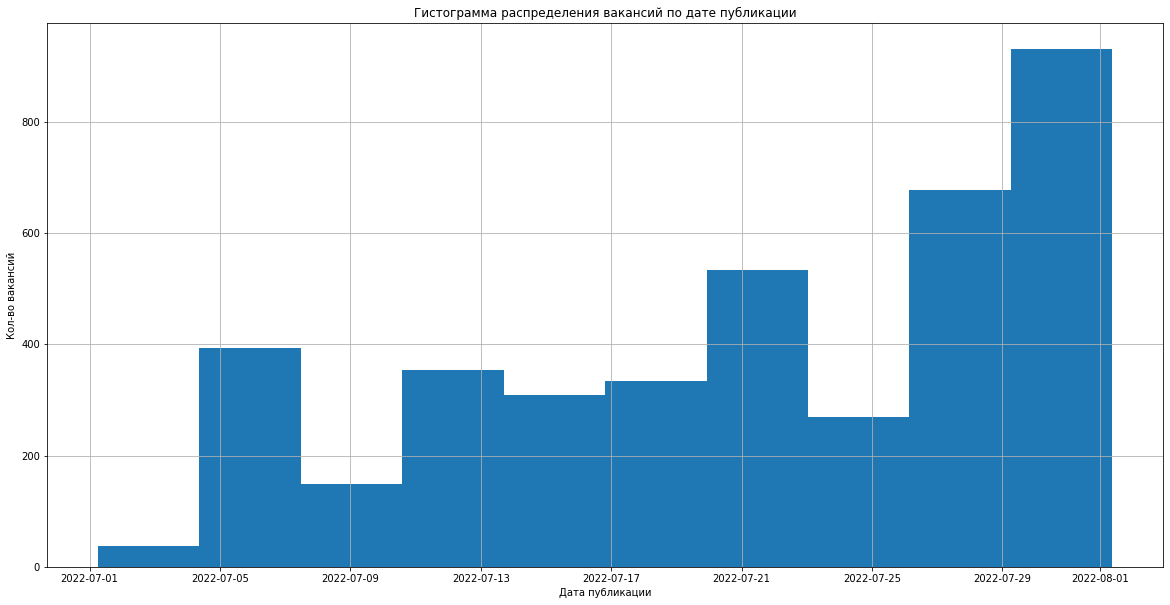

In [34]:
df['published_at'].hist(figsize = [20,10])
plt.title('Гистограмма распределения вакансий по дате публикации')
plt.xlabel('Дата публикации')
plt.ylabel('Кол-во вакансий')
plt.show()

In [ ]:
#большая часть выгруженных вакансий опубликованы за последнюю неделю

In [25]:
df['name'] = df.name.str.lower()

In [26]:
vac_for_me = []
for el in df['name'].values:
    if 'data analyst'  in el:
        vac_for_me.append(el)

In [27]:
vac_for_me

['data analyst',
 'data engineer / data analyst',
 'senior data analyst (в трайб «массовая персонализация»)',
 'data analyst "corporate customers 360"',
 'data analyst',
 'data analyst',
 'data analyst',
 'data analyst / data engineer (биометрия)',
 'data analyst sberdevices',
 'data engineer / data analyst (sberdata)']

In [28]:
df_vac = df[df['name'].isin(vac_for_me)]
df_vac = df_vac[df_vac['key_skills'] != 'Отсутствует']
df_vac

,id,name,salary,department,description,key_skills,published_at,created_at,published_at_dayofweek
1325,67511220,data engineer / data analyst,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Мы - новая команда Управления ИТ «Кредитные пр...,"[Big Data, ETL, ORACLE, СУБД, CI, Bash, Java]",2022-07-05 13:57:28,2022-07-05 13:57:28,1
1357,67900726,senior data analyst (в трайб «массовая персона...,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Ищем аналитика данных в команду розничного биз...,"[Teradata, SQL, Python, Анализ данных, MS SQL,...",2022-07-19 06:43:05,2022-07-19 06:43:05,1
1646,67707096,data analyst,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Мы - это самый большой Бэкофис процессинга в Е...,"[SQL, XML, kafka, JSON API, REST, Анализ данных]",2022-07-12 12:28:54,2022-07-12 12:28:54,1
2709,55301449,data analyst,"{'from': 115000, 'to': None, 'currency': 'RUR'...","{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Сбер - это крупнейшая цифровая экосистема. Тех...,"[SQL, Big Data, Hadoop, Spark]",2022-07-10 11:19:07,2022-07-10 11:19:07,6
3527,67537155,data analyst / data engineer (биометрия),None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Мы команда SmartBio занимающаяся разработкой а...,"[Python, SQL, Linux, Английский язык, Numpy, P...",2022-07-06 09:52:28,2022-07-06 09:52:28,2
3594,67406605,data analyst sberdevices,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}","SberDevices - новое направление компании, кото...","[Python, SQL, Анализ данных, ML, pandas, A/B т...",2022-07-27 13:14:27,2022-07-27 13:14:27,2
3687,66933327,data engineer / data analyst (sberdata),None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",В SberData мы создаем централизованное хранили...,"[Hadoop, NoSQL, Администрирование, Kafka]",2022-07-27 10:11:41,2022-07-27 10:11:41,2


In [29]:
vac_skills = df_vac['key_skills'].to_list()

In [30]:
skill_list = []
for i in vac_skills:
    skill_list.extend(i)
    

In [31]:
Counter(skill_list)

Counter({'Big Data': 2,
         'ETL': 1,
         'ORACLE': 2,
         'СУБД': 1,
         'CI': 1,
         'Bash': 1,
         'Java': 1,
         'Teradata': 1,
         'SQL': 5,
         'Python': 3,
         'Анализ данных': 3,
         'MS SQL': 1,
         'Навыки презентации': 1,
         'Аналитика': 1,
         'Qlik View': 1,
         'PowerPoint': 1,
         'BI': 1,
         'Sas': 1,
         'Agile': 1,
         'Hive': 1,
         'XML': 1,
         'kafka': 1,
         'JSON API': 1,
         'REST': 1,
         'Hadoop': 2,
         'Spark': 1,
         'Linux': 1,
         'Английский язык': 1,
         'Numpy': 1,
         'Pandas': 1,
         'Математический анализ': 1,
         'Машинное обучение': 1,
         'ML': 1,
         'pandas': 1,
         'A/B тесты': 1,
         'Ad Hoc Analysis': 1,
         'NoSQL': 1,
         'Администрирование': 1,
         'Kafka': 1})

In [ ]:
# три основных скилла для Data-аналитика - это SQL, Python и  анализ данных.